In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2024-09-25 02:53:55.425533: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 02:53:55.488477: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 02:53:55.492153: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-25 02:53:55.556646: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 02:53:56.476145: W tensorflow/compiler/tf2

In [2]:
# from tensorflow.keras import mixed_precision

# # Set the global policy to mixed precision
# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)


In [3]:
# import os

# # Set the environment variable
# os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

In [4]:
# data = pd.read_csv("C:\Users\alanx\OneDrive - The University of Sydney (Students)\Thesis\Deep Learning\wifi_localization\data\csv\ultimate_combined.csv")
# data = pd.read_csv("data/csv/ultimate_combined.csv")
data = pd.read_csv("data/csv/still/still.csv")
data.head()

,timestamps,csi_len,channel,err_info,noise_floor,rate,bandWidth,num_tones,nr,nc,...,payload_length,block_length,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,with_receiver,coord1,coord2
0,4170220887,560,2437,0,0,143,0,56,2,2,...,1320,1904,1,166.111408,80.056230,-1.376943,2.294327,0,6,2
1,4170220887,560,2437,0,0,143,0,56,2,2,...,1320,1904,2,168.866811,144.627107,2.816097,-0.513143,0,6,2
2,4170220887,560,2437,0,0,143,0,56,2,2,...,1320,1904,3,173.366663,86.052310,-1.373401,2.249167,0,6,2
3,4170220887,560,2437,0,0,143,0,56,2,2,...,1320,1904,4,172.409396,151.092687,2.792326,-0.534744,0,6,2
4,4170220887,560,2437,0,0,143,0,56,2,2,...,1320,1904,5,176.567268,89.196412,-1.400061,2.308611,0,6,2


In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


I0000 00:00:1727196852.219901    3867 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727196853.124958    3867 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727196853.127117    3867 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [6]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


I0000 00:00:1727196853.139119    3867 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727196853.141450    3867 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727196853.143623    3867 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727196853.243446    3867 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [7]:
variances = data.var()
print(variances)

low_variance_cols = variances[variances < 5e-3].index.tolist()
print("Columns with low or zero variance:")
print(low_variance_cols)

timestamps        1.929837e+18
csi_len           9.590696e+03
channel           2.805950e-03
err_info          4.619301e-03
noise_floor       0.000000e+00
rate              8.232657e+00
bandWidth         0.000000e+00
num_tones         0.000000e+00
nr                0.000000e+00
nc                1.223303e-01
rssi              7.971408e+00
rssi1             4.820231e+00
rssi2             1.001318e+01
rssi3             0.000000e+00
payload_length    1.846202e+04
block_length      2.814382e+04
subcarriers       2.612500e+02
ant1_amplitude    4.187203e+03
ant2_amplitude    5.506470e+03
ant1_phase        3.289260e+00
ant2_phase        3.291396e+00
with_receiver     0.000000e+00
coord1            3.996401e+00
coord2            2.251143e+00
dtype: float64
Columns with low or zero variance:
['channel', 'err_info', 'noise_floor', 'bandWidth', 'num_tones', 'nr', 'rssi3', 'with_receiver']


In [8]:
# Drop constant columns and timeframe from the DataFrame
data.drop(low_variance_cols, axis=1, inplace=True)
data.drop('timestamps', axis=1, inplace=True)
data.head()

,csi_len,rate,nc,rssi,rssi1,rssi2,payload_length,block_length,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,coord1,coord2
0,560,143,2,58,53,56,1320,1904,1,166.111408,80.056230,-1.376943,2.294327,6,2
1,560,143,2,58,53,56,1320,1904,2,168.866811,144.627107,2.816097,-0.513143,6,2
2,560,143,2,58,53,56,1320,1904,3,173.366663,86.052310,-1.373401,2.249167,6,2
3,560,143,2,58,53,56,1320,1904,4,172.409396,151.092687,2.792326,-0.534744,6,2
4,560,143,2,58,53,56,1320,1904,5,176.567268,89.196412,-1.400061,2.308611,6,2


In [9]:
features_to_scale = ['csi_len', 'payload_length', 'block_length', 'ant1_amplitude', 'ant2_amplitude', 'ant1_phase', 'ant2_phase', 'rssi', 'rssi1', 'rssi2']
scaler = StandardScaler()

# Apply standardization on features
# data = data_cleaned.copy()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [10]:
data.head()

,csi_len,rate,nc,rssi,rssi1,rssi2,payload_length,block_length,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,coord1,coord2
0,0.407971,143,2,-0.721583,-0.491469,-0.820802,-1.281532,-0.799796,1,-0.187897,-0.964817,-0.762717,1.268949,6,2
1,0.407971,143,2,-0.721583,-0.491469,-0.820802,-1.281532,-0.799796,2,-0.145316,-0.094656,1.549240,-0.278531,6,2
2,0.407971,143,2,-0.721583,-0.491469,-0.820802,-1.281532,-0.799796,3,-0.075775,-0.884014,-0.760765,1.244057,6,2
3,0.407971,143,2,-0.721583,-0.491469,-0.820802,-1.281532,-0.799796,4,-0.090569,-0.007525,1.536134,-0.290437,6,2
4,0.407971,143,2,-0.721583,-0.491469,-0.820802,-1.281532,-0.799796,5,-0.026314,-0.841644,-0.775465,1.276823,6,2


In [11]:
data = pd.concat([data, pd.get_dummies(data['subcarriers'], prefix='subcarrier')], axis=1)
data.drop('subcarriers', axis=1, inplace=True)
data.head()

,csi_len,rate,nc,rssi,rssi1,rssi2,payload_length,block_length,ant1_amplitude,ant2_amplitude,...,subcarrier_47,subcarrier_48,subcarrier_49,subcarrier_50,subcarrier_51,subcarrier_52,subcarrier_53,subcarrier_54,subcarrier_55,subcarrier_56
0,0.407971,143,2,-0.721583,-0.491469,-0.820802,-1.281532,-0.799796,-0.187897,-0.964817,...,False,False,False,False,False,False,False,False,False,False
1,0.407971,143,2,-0.721583,-0.491469,-0.820802,-1.281532,-0.799796,-0.145316,-0.094656,...,False,False,False,False,False,False,False,False,False,False
2,0.407971,143,2,-0.721583,-0.491469,-0.820802,-1.281532,-0.799796,-0.075775,-0.884014,...,False,False,False,False,False,False,False,False,False,False
3,0.407971,143,2,-0.721583,-0.491469,-0.820802,-1.281532,-0.799796,-0.090569,-0.007525,...,False,False,False,False,False,False,False,False,False,False
4,0.407971,143,2,-0.721583,-0.491469,-0.820802,-1.281532,-0.799796,-0.026314,-0.841644,...,False,False,False,False,False,False,False,False,False,False


# Model

In [12]:
X = data.drop(columns=['coord1', 'coord2']) 
y = data[['coord1', 'coord2']]

In [13]:
# First, split the data into training and a temporary set (which will later be split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% train, 40% temp

# Now, split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% val, 20% test

# Check the shapes of your splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (7484064, 68)
Validation set shape: (2494688, 68)
Test set shape: (2494688, 68)


In [14]:
def create_dnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    
    # Hidden layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    
    # Output layer for regression (2 neurons for x and y coordinates)
    model.add(layers.Dense(2))  # For 2D localization, change to 3 for 3D localization

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Example of creating the model, input_shape should be (number of features,)
input_shape = (X_train.shape[1],)  # Adjust based on your number of features
model = create_dnn_model(input_shape)

# Print the model summary
model.summary()

/home/alan-xie/Documents/Thesis/wifi_localization/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1727196863.296442    3867 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727196863.297600    3867 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727196863.298597    3867 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA no

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         8,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,234 (75.13 KB)

 Trainable params: 19,234 (75.13 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train, 
                        epochs=50, 
                        batch_size=128, 
                        validation_data=(X_val, y_val),
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluate the model on test data
    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


2024-09-25 02:54:25.020728: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2035665408 exceeds 10% of free system memory.
2024-09-25 02:54:25.920859: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2035665408 exceeds 10% of free system memory.


Epoch 1/50


I0000 00:00:1727196867.498885    4274 service.cc:146] XLA service 0x7c44e80043f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727196867.498899    4274 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-09-25 02:54:27.517254: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-25 02:54:27.755448: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-09-25 02:54:28.851020: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_384', 12 bytes spill stores, 12 bytes spill loads



  212/58470 ━━━━━━━━━━━━━━━━━━━━ 41s 714us/step - loss: 10.3349 - mae: 2.1425 

I0000 00:00:1727196870.440919    4274 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


58433/58470 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 2.9488 - mae: 1.4237

2024-09-25 02:55:12.097350: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_380', 8 bytes spill stores, 8 bytes spill loads



58470/58470 ━━━━━━━━━━━━━━━━━━━━ 59s 941us/step - loss: 2.9486 - mae: 1.4237 - val_loss: 2.6512 - val_mae: 1.3465
Epoch 2/50
58470/58470 ━━━━━━━━━━━━━━━━━━━━ 51s 862us/step - loss: 2.6188 - mae: 1.3335 - val_loss: 2.5554 - val_mae: 1.3120
Epoch 3/50
58470/58470 ━━━━━━━━━━━━━━━━━━━━ 51s 871us/step - loss: 2.5607 - mae: 1.3132 - val_loss: 2.5327 - val_mae: 1.3026
Epoch 4/50
58470/58470 ━━━━━━━━━━━━━━━━━━━━ 51s 876us/step - loss: 2.5313 - mae: 1.3030 - val_loss: 2.5084 - val_mae: 1.2950
Epoch 5/50
58470/58470 ━━━━━━━━━━━━━━━━━━━━ 52s 891us/step - loss: 2.5137 - mae: 1.2973 - val_loss: 2.4995 - val_mae: 1.2907
Epoch 6/50
58470/58470 ━━━━━━━━━━━━━━━━━━━━ 52s 879us/step - loss: 2.4974 - mae: 1.2921 - val_loss: 2.4933 - val_mae: 1.2907
Epoch 7/50
58470/58470 ━━━━━━━━━━━━━━━━━━━━ 52s 890us/step - loss: 2.4789 - mae: 1.2867 - val_loss: 2.4607 - val_mae: 1.2835
Epoch 8/50
58470/58470 ━━━━━━━━━━━━━━━━━━━━ 52s 878us/step - loss: 2.4573 - mae: 1.2800 - val_loss: 2.4220 - val_mae: 1.2724
Epoch 9/50


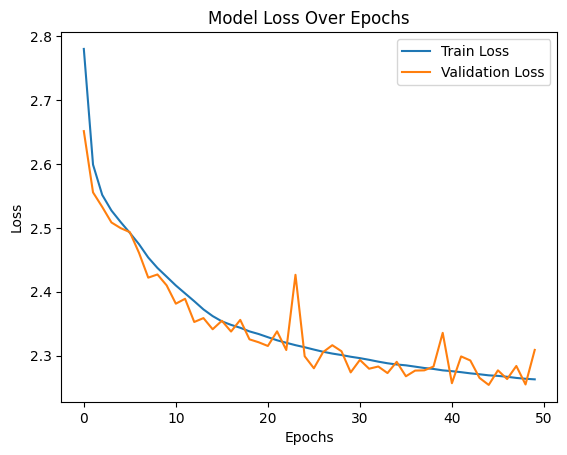

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
